# Jupyter Refactoring for Beginners

<img src="../assets/Title.png" width="800">

## Workshop structure

- [Introduction](#Introduction)
- [Why Refactoring is needed](#Why-Refactoring-is-needed)
- [How to refactor your code (prerequisites)](#How-to-refactor-your-code-(prerequisites))
- [How to write cleaner and more efficient code in Pythonic way](#How-to-write-cleaner-and-more-efficient-code-in-Pythonic-way)
- [Bonus](#Bonus)
- [Q&A time](#Q&A-time)

## Introduction

### About me
**Alyona Galyeva**: [Principal Data Solutions Engineer at LINKIT](https://www.linkit.nl/en) and [Organiser at PyLadies Amsterdam](https://amsterdam.pyladies.com/)

<img src="../assets/PyLadies1.jpg" width="800">  

<img src="../assets/PyLadies2.jpg" width="800">  

<img src="../assets/PyLadies3.jpg" width="800"> 

Feel free to contact me via LinkedIn: https://www.linkedin.com/in/alyonagalyeva/


## Why Refactoring is needed



![Awesome script](https://chezsoi.org/lucas/blog/images/wwcb/Ill_just_write_a_quick_script...-catacrac.net.png)

### Welcome to the land of Spaghetti code and Big Ball of Mud

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# DO NOT REPEAT THIS AT HOME !!! IT IS DANGEROUS AND CONTAGIOUS !!!
file = "/Users/alyonagalyeva/tutorials/WIP/Jupyter-refactoring-beginner-jul2020/workshop/data/Boston_housing_prices.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df=pd.read_csv(file, delim_whitespace=True, names=names)

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df1=df[df['CHAS'] > 0]

In [8]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403.0,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403.0,14.7,338.92,5.50,27.0


In [9]:
df2=df[df['AGE']==45.8]

In [10]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
77,0.08707,0.0,12.83,0,0.437,6.140,45.8,4.0905,5,398.0,18.7,386.96,10.27,20.8


In [11]:
df3=df.rename(str.lower, axis='columns')

In [12]:
df3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
# Hoerra, we have a function !!!
def twicecol(df, dfcol):
    df['twicecol'] = df[dfcol] * df[dfcol]
    return df

In [14]:
df4=twicecol(df3, 'nox')
df4.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,twicecol
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.289444
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.219961
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.219961
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.209764
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.209764


In [15]:
# Oops, we mutated original dataframe df3, how it is even possible?
df3.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,twicecol
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.289444
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.219961
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.219961
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.209764
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.209764


### "Refactoring is the process of changing a software system in such a way that it does not alter the external behaviour of the code yet improves its internal structure" - *Martin Fowler*

**So, why do we need Refactoring?**

- to understand the code
- to improve the readability of code
- to make it easier to enhance the code
- to reduce time of bug hunting


**What is Technical Debt?**

1. It's a metaphor to describe problems with code design
2. It's a lot of shortcuts taken for various reasons
3. We borrow against future
4. It needs to be paid off with refactoring

**When to stop Refactoring?**

- Stop when your refactoring step becomes too big
- Stop when there is no ROI

## How to refactor your code (prerequisites)


### The art of Recognizing Issues in your code

how comments can help or badly hurt you

In [16]:
# give new names to the columns by renaming the columns and make each columns lowercase, use axis columns 
df3=df.rename(str.lower, axis='columns')

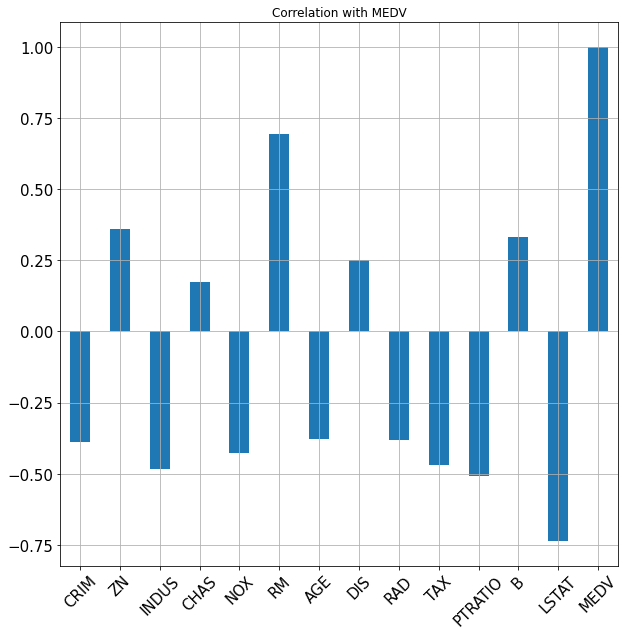

In [17]:
## Correlation with independent Variable (Note: Models like RF are not linear like these)
df.columns
df2 = df.drop('MEDV', axis=1)
df.corrwith(df['MEDV']).plot.bar(
        figsize = (10, 10), title = "Correlation with MEDV", fontsize = 15,
        rot = 45, grid = True)

confusing names

In [18]:
# Remember our friends df, df1, df2 and this awesome function?
def twicecol(df, dfcol):
    df['twicecol'] = df[dfcol] * df[dfcol]
    return df

magic numbers

In [19]:
# Somewhere in notebook
val = 6

# later somewhere at the end of the notebook
grouped = df.groupby('TAX').agg([np.sum, np.mean, np.std])

if val > 6:
    print(grouped.head())
else:
    print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


duplication and large code blocks are dangerous 

In [20]:
#Define X and y
X = df2
y = df.loc[:,'MEDV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Model Building ####
### Comparing Models

## Multiple Linear Regression Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

results = pd.DataFrame([['Multiple Linear Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

## Suport Vector Regression 
'Necessary Standard Scaler '
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Support Vector RBF', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

## Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

# Predicting Test Set
y_pred = regressor.predict(X_test)
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree Regression', mae, mse, rmse, r2]],
               columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

results = results.append(model_results, ignore_index = True)

poor formatting

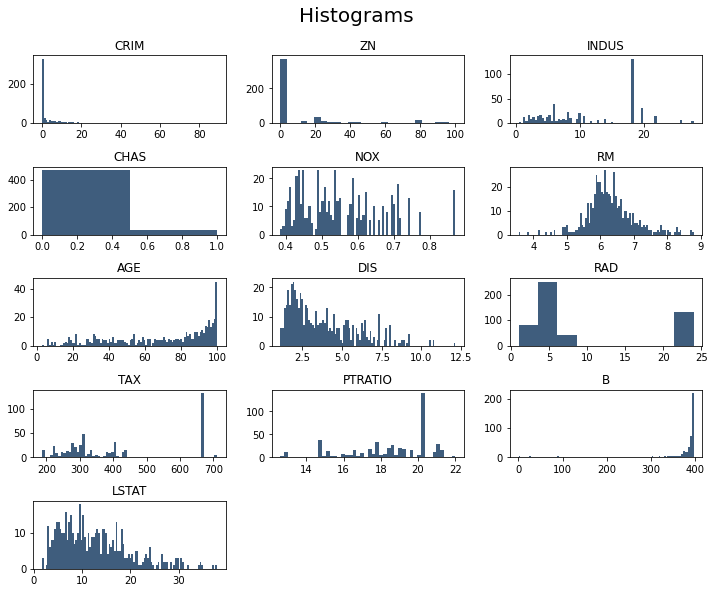

In [21]:
fig=plt.figure( figsize=(10, 10) ); plt.suptitle( 'Histograms', fontsize=20 )
for i in range(df2.shape[1]):
    plt.subplot( 6,3,i+1);f = plt.gca();f.set_title(df2.columns.values[i])

    vals = np.size(df2.iloc[:, i].unique())
    if vals>=100: vals=100
    
    plt.hist(df2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

zombie code

In [22]:
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)

#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)

## How to write cleaner and more efficient code in Pythonic way


### So, what should I do?

- answer why refactoring is needed in this particular situation
- git, conda environment (or venv) are your best friends
- make a copy of a notebook you are going to refactor
- move all imports to the top
- fix the seed
- pick a chunk of code, create a function
- write tests for this function, run tests
- if success --> git commit
- else update your function to make the tests pass --> git commit
- repeat

**Exercise 1:**

Take a look at the notebooks, do you recognize any of above mentioned code issues here?


## Bonus

### Future readings

### Useful links

## Q&A time

### Thank you for your time !!!